# Prediction Project  
According to the data obtained during 4 years, we want to check the effective parameters in NOX & CO through the machine learning algorithm.



After analyzing the data and applying two models, Random Forest and Linear Regression, we conclude that the better method to use is Random Forest. It appears to be the best fit for our dataset.

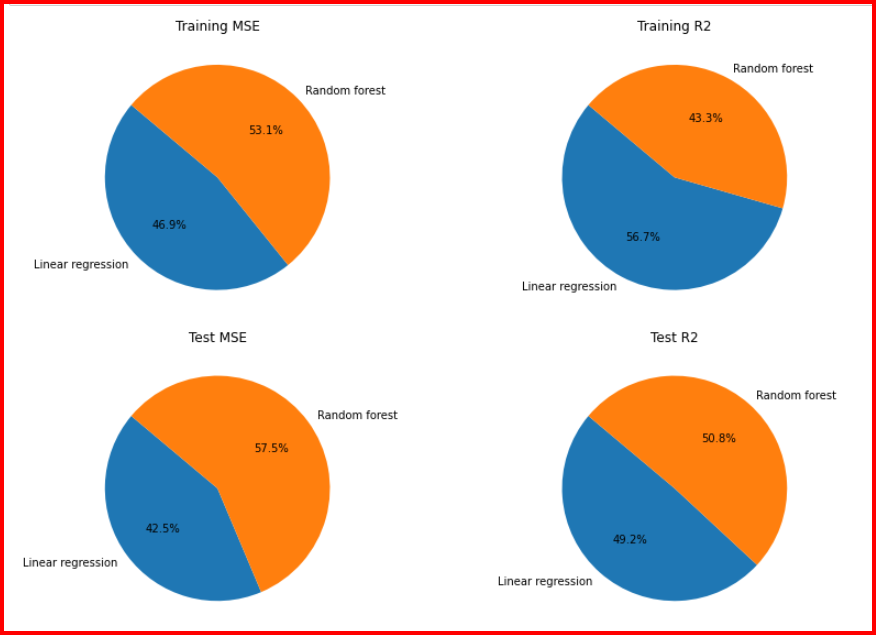

# importing libraries


In [2]:
import pandas as pd
import csv
import random
#import squarify
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# reading data

In [3]:
data1 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2012.csv")
data2 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2013.csv")
data3 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2014.csv")
data1.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


# drawing the heat map visualization

<AxesSubplot:>

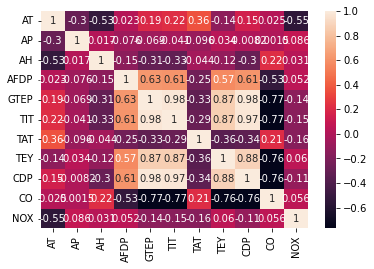

In [4]:
correlation_matrix=data1.corr(method="spearman")
sns.heatmap(correlation_matrix,annot=True)

In [5]:
data1.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.303630,-0.544544,-0.020545,-0.054481,0.161895,0.445713,-0.198060,-0.091440,-0.084566,-0.566584
AP,-0.303630,1.000000,0.031861,-0.050262,0.025086,-0.011361,-0.153964,0.071081,0.065158,0.033716,0.147930
AH,-0.544544,0.031861,1.000000,-0.139929,-0.197410,-0.268054,-0.051182,-0.107315,-0.179343,0.193597,0.080575
AFDP,-0.020545,-0.050262,-0.139929,1.000000,0.669609,0.538204,-0.487748,0.623471,0.643476,-0.372112,-0.054130
GTEP,-0.054481,0.025086,-0.197410,0.669609,1.000000,0.867926,-0.693876,0.977945,0.994281,-0.562234,-0.157915
TIT,0.161895,-0.011361,-0.268054,0.538204,0.867926,1.000000,-0.254020,0.880744,0.885306,-0.727175,-0.226817
TAT,0.445713,-0.153964,-0.051182,-0.487748,-0.693876,-0.254020,1.000000,-0.659749,-0.671495,0.045579,-0.093118
TEY,-0.198060,0.071081,-0.107315,0.623471,0.977945,0.880744,-0.659749,1.000000,0.988539,-0.596748,-0.066708
CDP,-0.091440,0.065158,-0.179343,0.643476,0.994281,0.885306,-0.671495,0.988539,1.000000,-0.576618,-0.125704
CO,-0.084566,0.033716,0.193597,-0.372112,-0.562234,-0.727175,0.045579,-0.596748,-0.576618,1.000000,0.246796


# Data Files
    AT: ambient temperature 
    AP: ambient pressure
    AH: ambient hiumidity
    AFDP: air filter difference pressure
    GTEP: gas turbine exhaust pressure
    TIT: turbine inlet temperature
    TAT: turbine after temperature
    CDP: compressor discharge pressure
    TEY: turbine energy yield
    CO: carbon monoxide 
    NOx: nitrogen oxides

## what are we looking for?
    
    Various information available in the data file against CO and NOx and plot them and then discover which parameter have more effects on CO and NOx
    
    
    

In [6]:
data1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000
mean,18.397950,1012.258153,79.074804,4.306717,25.181361,1082.890233,546.263793,132.675552,12.000121,2.361133,68.788965
std,7.661038,6.384291,14.105087,0.831170,4.006825,16.852148,7.331345,15.302140,1.049384,2.474116,10.224937
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.007505,41.777000
25%,12.269250,1008.400000,69.165250,3.882650,23.090750,1075.800000,547.657500,125.240000,11.469750,1.127125,62.531250
50%,19.120500,1012.000000,82.411500,4.298050,25.221000,1089.100000,549.920000,133.760000,12.041000,1.636300,67.246500
75%,24.337250,1016.000000,90.356250,4.670525,26.322250,1093.800000,550.070000,134.900000,12.290000,2.953025,73.424500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


In [7]:
data2.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7152.00000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000
mean,17.60262,1011.999607,80.461624,3.695958,25.105097,1081.569463,545.780885,132.168342,11.971586,2.723031,70.007899
std,6.86289,6.290065,14.125390,0.805829,4.350711,17.385147,7.358935,16.348156,1.132159,2.363913,12.048249
min,0.28985,989.380000,27.504000,2.329500,18.104000,1022.100000,518.320000,101.480000,9.875400,0.005033,43.198000
25%,12.04875,1008.400000,71.493500,3.100350,21.385000,1065.975000,543.745000,118.005000,11.001250,1.257975,62.269000
50%,17.20450,1011.800000,84.002000,3.627850,24.852500,1087.300000,549.900000,133.570000,11.956000,1.782700,68.651000
75%,23.16400,1016.000000,91.579000,4.156825,26.385750,1094.400000,550.030000,135.520000,12.319250,3.591225,76.001500
max,33.87300,1029.700000,100.190000,6.977900,36.950000,1100.500000,550.530000,172.960000,14.867000,35.045000,119.910000


In [8]:
data1.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

# creating the list of our column 

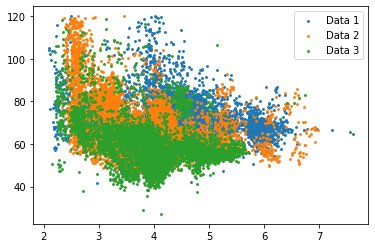

In [9]:
plt.scatter(data1["AFDP"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 1')
plt.scatter(data2["AFDP"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
plt.scatter(data3["AFDP"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')

plt.legend()

# in below plot we see that we can take decision based on the complicated figure below. 

    now i want to have the upper diagram next to each other to analysis them and visualize them

# NOX Based on AFDP

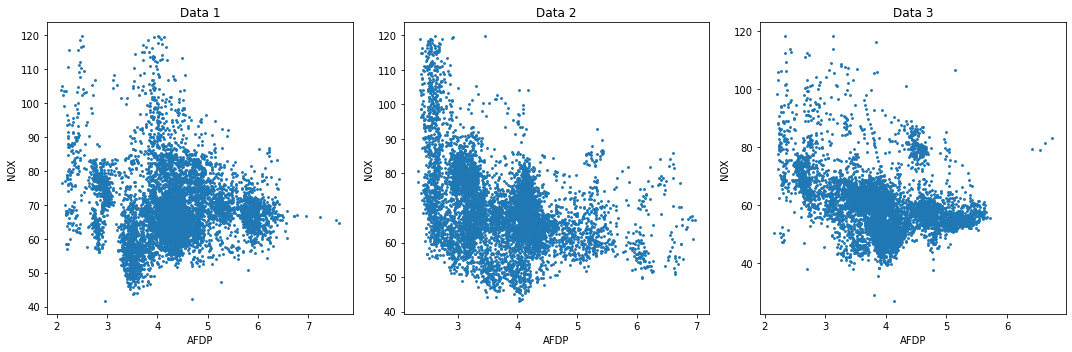

In [10]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["AFDP"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('AFDP')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["AFDP"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('AFDP')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["AFDP"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('AFDP')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


# NOX Based on AT

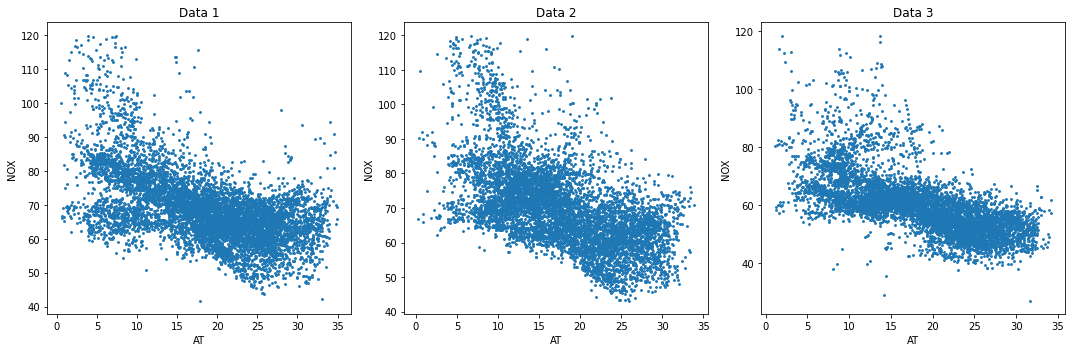

In [11]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["AT"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('AT')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["AT"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('AT')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["AT"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('AT')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


# NOX Based on AP

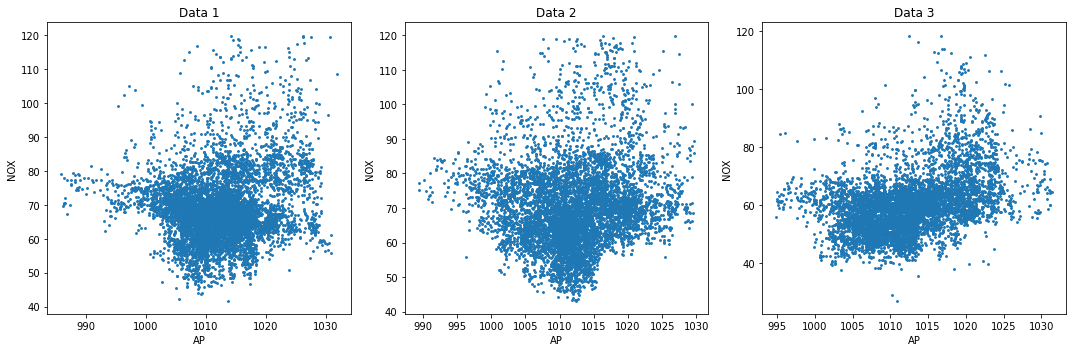

In [12]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["AP"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('AP')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["AP"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('AP')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["AP"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('AP')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# NOX Based on AH

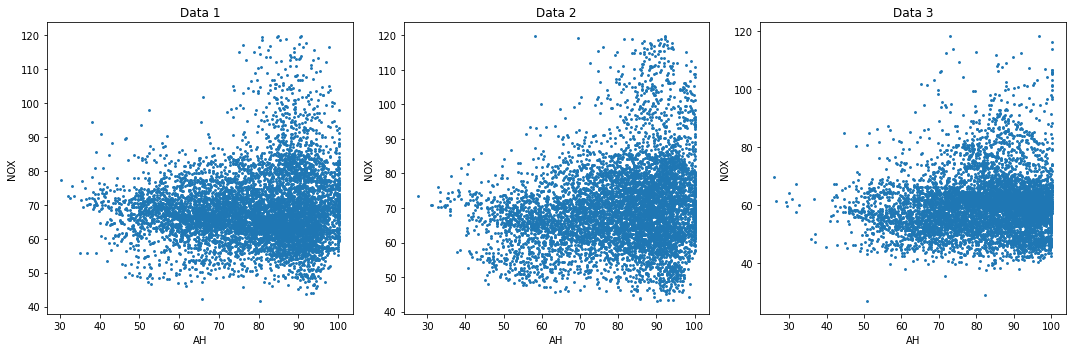

In [13]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["AH"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('AH')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["AH"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('AH')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["AH"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('AH')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# NOX Based on GTEP

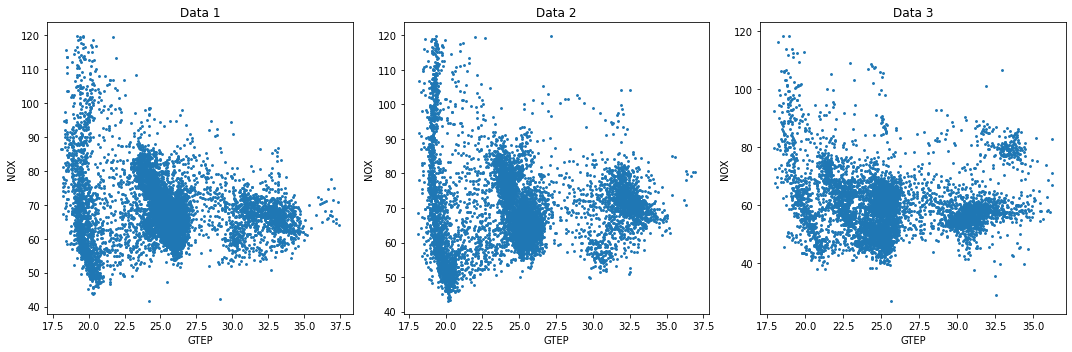

In [14]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["GTEP"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('GTEP')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["GTEP"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('GTEP')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["GTEP"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('GTEP')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# NOX Based on TIT

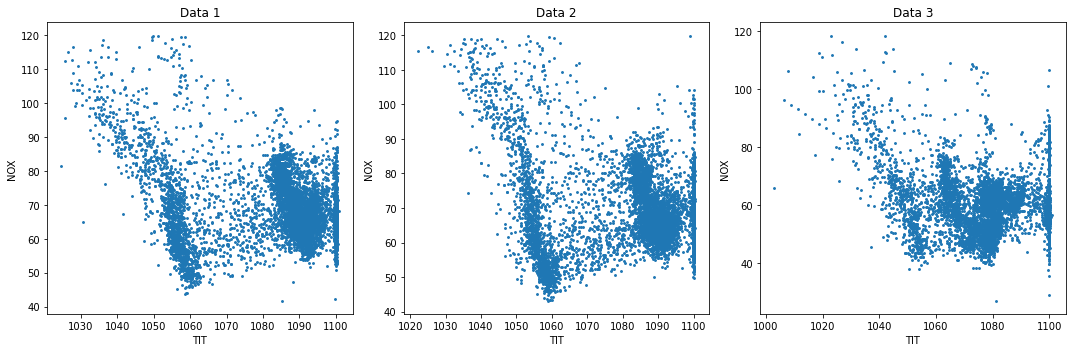

In [15]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["TIT"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('TIT')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["TIT"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('TIT')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["TIT"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('TIT')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# NOX Based on TAT


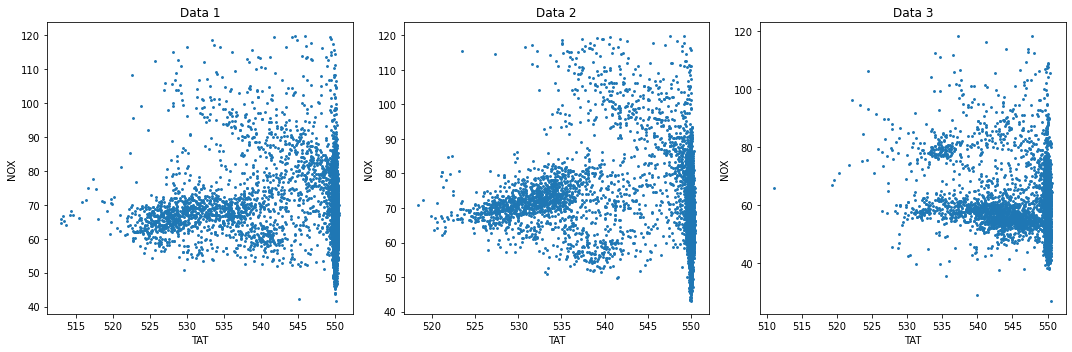

In [16]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["TAT"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('TAT')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["TAT"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('TAT')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["TAT"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('TAT')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# NOX Based on CDP


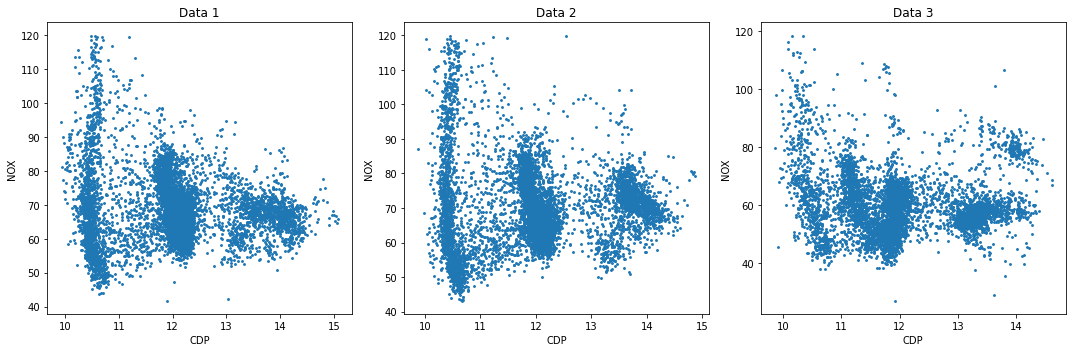

In [17]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Data 1
axs[0].scatter(data1["CDP"], data1['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[0].set_title('Data 1')
axs[0].set_xlabel('CDP')
axs[0].set_ylabel('NOX')

# Scatter plot for Data 2
axs[1].scatter(data2["CDP"], data2['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 2')
axs[1].set_title('Data 2')
axs[1].set_xlabel('CDP')
axs[1].set_ylabel('NOX')

# Scatter plot for Data 3
axs[2].scatter(data3["CDP"], data3['NOX'], s=2, alpha=1, linewidths=1.5, label='Data 3')
axs[2].set_title('Data 3')
axs[2].set_xlabel('CDP')
axs[2].set_ylabel('NOX')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Lets divide our data to train set and test set

we used of diving our data to two part. 
<br> one for training set that include 80% of main data, and the other for test set


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data files
data_file1 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2012.csv")
data_file2 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2013.csv")
data_file3 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2014.csv")
data_file4 = pd.read_csv(r"C:\Users\ASUS\Desktop\Projects\Thermodynamic\gt_2015.csv")

# Combine the first three files for training
train_data = pd.concat([data_file1, data_file2, data_file3], ignore_index=True)

# Keep the fourth file for testing
test_data = data_file4

# Optionally, shuffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Split the data into features (X) and labels (y) if applicable
# Assuming the last column is the target label
X_train = train_data.iloc[:, :-2]  # Features for training
y_train = train_data[["CO", "NOX"]]   # Target labels for training

X_test = test_data.iloc[:, :-2]    # Features for testing
y_test = test_data[["CO", "NOX"]]     # Target labels for testing

# If you only have features and no labels for testing data, you can skip the y_test assignment.


In [19]:
X_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,11.6970,1011.2,91.783,4.2336,19.337,1051.9,548.44,110.71,10.352
1,31.7100,1009.2,58.096,4.5637,27.040,1097.2,550.02,134.79,12.359
2,19.2020,1006.1,60.112,5.1279,26.559,1090.0,546.48,137.82,12.409
3,26.9710,1014.7,49.114,4.4484,26.167,1094.3,549.84,134.75,12.229
4,7.0737,1022.3,80.259,4.5556,24.761,1088.6,549.98,137.56,12.041
...,...,...,...,...,...,...,...,...,...
21933,11.4080,1004.6,91.326,6.0597,32.657,1099.9,532.42,158.65,13.697
21934,4.0597,1019.3,93.768,6.1618,34.890,1099.9,523.13,168.52,14.429
21935,23.2960,1011.2,86.068,4.6588,25.266,1080.8,549.55,130.64,12.040
21936,8.2938,1023.7,76.979,2.2654,18.895,1039.8,544.25,109.41,10.460


In [20]:
X_test

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,22.6010,1007.5,62.111,3.4595,21.660,1061.4,549.81,117.51,11.066
1,4.3940,1006.7,66.381,3.0755,23.157,1072.8,550.04,130.48,11.617
2,27.1770,1006.2,75.663,4.2280,29.114,1100.0,548.68,144.45,13.023
3,6.5806,1031.6,90.759,3.5532,23.313,1075.8,549.81,130.31,11.700
4,20.6770,1010.3,63.277,3.1584,22.470,1066.6,550.34,122.07,11.299
...,...,...,...,...,...,...,...,...,...
7379,18.6230,1013.0,65.447,2.8013,24.426,1048.5,549.87,109.29,10.486
7380,25.4000,1011.3,51.279,4.3495,30.858,1100.0,542.12,150.57,13.388
7381,11.9700,1031.9,69.881,2.6338,18.785,1045.8,547.90,109.23,10.489
7382,25.7990,1014.5,81.274,4.2562,29.178,1099.7,546.74,145.81,13.097


# Method implementation
 

Now, lets try to implement the our model that we choose to train our model 
<br> here at first i use the Random Forest Method which is a commonly-used machine learning algorithm, that combines <br>the output of multiple decision trees to reach a single result



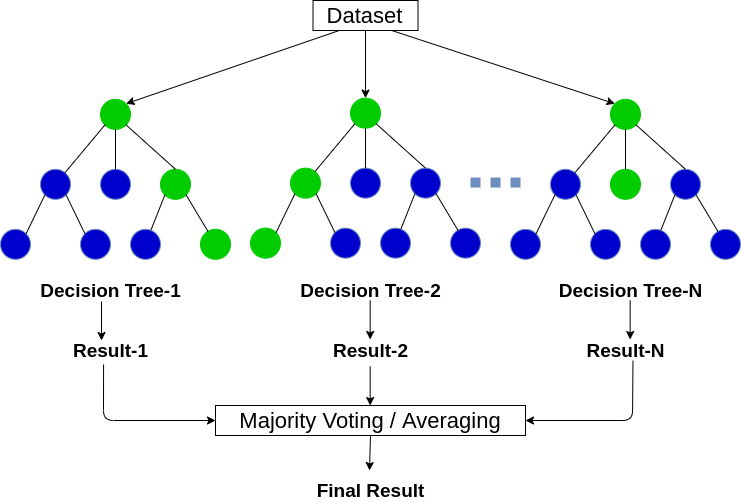

#  here we want to train our machine based on data that we have


# Linear Regression


In [21]:
from sklearn.linear_model import LinearRegression

Linear_R = LinearRegression()
Linear_R.fit(X_train, y_train)

LinearRegression()

# Applying the model to make a prediction


In [22]:
y_lr_train_pred = Linear_R.predict(X_train)
y_lr_test_pred = Linear_R.predict(X_test)

In [23]:
y_lr_train_pred

array([[ 5.11543845, 74.50607691],
       [ 0.93219806, 58.9273869 ],
       [ 1.41327866, 72.90308819],
       ...,
       [ 2.21426896, 55.96422971],
       [ 6.82830755, 77.5334144 ],
       [ 2.68859506, 56.13230331]])

In [24]:
y_lr_test_pred

array([[ 4.10877225, 63.51703595],
       [ 2.05898009, 85.65396352],
       [ 0.33606862, 53.02463208],
       ...,
       [ 5.88776294, 74.10698032],
       [ 0.62479609, 52.32698952],
       [ 0.18434117, 72.2557912 ]])

# Evaluate model performance


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [26]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  34.63958324634599
LR R2 (Train):  0.5537290848251177
LR MSE (Test):  52.47782302134231
LR R2 (Test):  0.1506591139871758


In [27]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,34.639583,0.553729,52.477823,0.150659


# Random Forest


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

# Applying the model to make a prediction


In [29]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

# Evaluate model performance


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [31]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,39.156848,0.42461,70.215036,0.167511


# Conclusion and their Percision of each one

In [32]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,34.639583,0.553729,52.477823,0.150659
0,Random forest,39.156848,0.42461,70.215036,0.167511


In [33]:
df_models.reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,34.639583,0.553729,52.477823,0.150659
0,Random forest,39.156848,0.42461,70.215036,0.167511


In [34]:
type(df_models)

pandas.core.frame.DataFrame

In [35]:
df_models.dtypes

Method          object
Training MSE    object
Training R2     object
Test MSE        object
Test R2         object
dtype: object

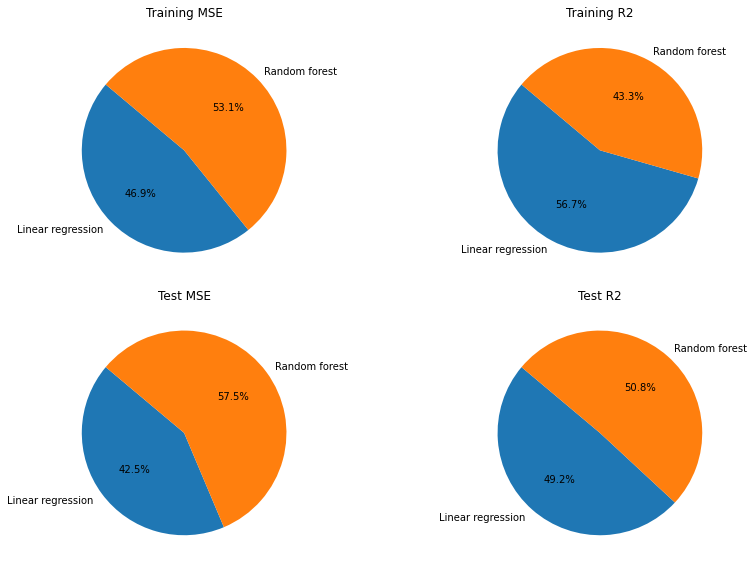

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided DataFrame
data = {
    'Method': ['Linear regression', 'Random forest'],
    'Training MSE': [34.639583, 39.209552],
    'Training R2': [0.553729, 0.423285],
    'Test MSE': [52.477823, 71.097511],
    'Test R2': [0.150659, 0.155519]
}

df_models = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Parameters to plot
parameters = ['Training MSE', 'Training R2', 'Test MSE', 'Test R2']

for i, parameter in enumerate(parameters, start=1):
    plt.subplot(2, 2, i)
    plt.pie(df_models[parameter], labels=df_models['Method'], autopct='%1.1f%%', startangle=140)
    plt.title(parameter)

plt.tight_layout()
plt.show()

In [37]:
plt.savefig('final_plot.png')

<Figure size 432x288 with 0 Axes>

# ----------------------------------------

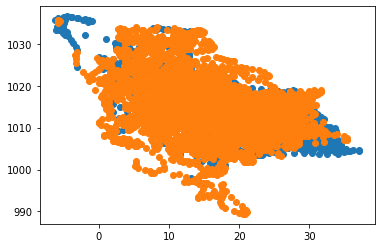

In [38]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(X_train, y_train)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(X_test)

# get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# plot Gaussian Mixture the clusters
if gaussian_clusters.any():
    for gaussian_cluster in gaussian_clusters:
        # get data points that fall in this cluster
        indices = np.where(gaussian_result == gaussian_cluster)[0]  # Access the first element of the tuple
        # make the plot
        plt.scatter(X_test.iloc[indices, 0], X_test.iloc[indices, 1])  # Assuming X_test has the same structure as X_train

# show the Gaussian Mixture plot
plt.show()


(array([ 927., 3180., 1574., 4958., 6296.,  525., 1879., 1823.,  739.,
          37.]),
 array([ 9.8518 , 10.37472, 10.89764, 11.42056, 11.94348, 12.4664 ,
        12.98932, 13.51224, 14.03516, 14.55808, 15.081  ]),
 <BarContainer object of 10 artists>)

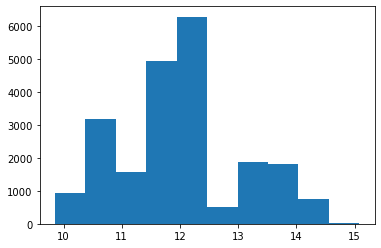

In [39]:
plt.hist(X_train["CDP"])

In [40]:
a = data1[["AT"]]
type(a)

pandas.core.frame.DataFrame

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'AFDP'}>],
       [<AxesSubplot:title={'center':'CDP'}>,
        <AxesSubplot:title={'center':'TEY'}>,
        <AxesSubplot:title={'center':'TAT'}>],
       [<AxesSubplot:title={'center':'TIT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

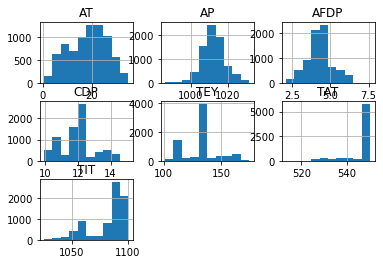

In [41]:
"""     data_visualization = []
        for i in data1:
        data_visualization.append(data1[i])
"""
#for i in data_visualization:
data_visualization = data1[["AT", "AP", "AFDP", "CDP", "TEY", "TAT", "TIT"]]
data_visualization.hist()


# Kolmogorov-Smirnov test  for my data

In [42]:
ks_statistic, p_value = ks_2samp(afdp1, nox1)
ks_statistic, p_value
#if ks_statistic=1, this means the datasets have completely different distributions.
#a p-value of 0 provides strong evidence to support the conclusion that the distributions of your datasets are different

NameError: name 'afdp1' is not defined

# Anderson-Darling test

In [ ]:
result = anderson(X_train["AFDP"], dist='norm')  # You can replace 'norm' with other distributions
result

# distribution


In [ ]:
#sns.kdeplot(afdp1, label='AFDP', color='blue')
sns.kdeplot(X_train["AFDP"], label='NOX', shade="True", color='orange')
"""
this will generate density plot based on kde of our data 
"""

In [ ]:
data1.columns

In [ ]:
cdp1 = data1["CDP"]
nox1 =  data1["NOX"]
nox1_log = np.log(nox1)/np.log(1.4)
plt.grid(True)
#plt.scatter(nox1, at1, s=1, alpha=1, linewidths=2)
plt.xlabel('NOX')
plt.ylabel('CDP1')
plt.scatter(nox1_log, cdp1, s=2.5, alpha=1, linewidths=1.5)

In [ ]:

cdp1_log = np.log(cdp1)/np.log(1.4)



#plt.figure(figsize=(8, 6))
plt.grid(True)
#plt.scatter(nox1, at1, s=1, alpha=1, linewidths=2)
plt.xlabel('NOX')
plt.ylabel('CDP1')
plt.scatter(nox1, cdp1_log, s=2.5, alpha=1, linewidths=1.5)

In [ ]:
correlation = nox1.corr(cdp1)
print("Correlation coefficient:", correlation)

In [ ]:
model = LinearRegression().fit(cdp1.values.reshape(-1, 1), nox1)
r_squared = model.score(cdp1.values.reshape(-1, 1), nox1)
print("R-squared:", r_squared)